100%|██████████| 1000/1000 [00:10<00:00, 93.29it/s]


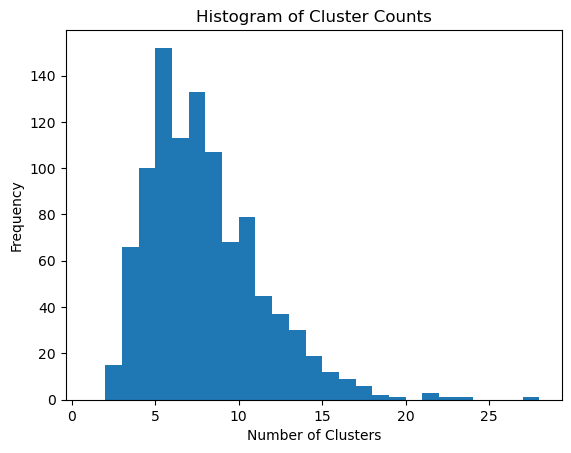

In [22]:
#NUMBER OF PREDICTED CLUSTERS PER EVENT

import pickle
import numpy as np
import torch
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set file pattern and file limit
file_pattern = r'C:\Users\tsoli\OneDrive\Documents\School\1 - University of Minnesota\Year 17\Year 1 Research\picklefiles\photons\*.pkl'
file_limit = 1000

# Load data from pkl files
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        score_noise_filter = pickle.load(f)
        pass_noise_filter = pickle.load(f)
        out_gravnet = pickle.load(f)
    return data, score_noise_filter, pass_noise_filter, out_gravnet

# Clustering algorithm from plots3D.
def get_clustering(beta, X, threshold_beta=0.2, threshold_dist=0.5):
    n_points = beta.shape[0]
    select_condpoints = beta > threshold_beta
    indices_condpoints = np.nonzero(select_condpoints)[0]
    indices_condpoints = indices_condpoints[np.argsort(-beta[select_condpoints])]
    unassigned = np.arange(n_points)
    clustering = -1 * np.ones(n_points, dtype=np.int32)
    
    for index_condpoint in indices_condpoints:
        d = np.linalg.norm(X[unassigned] - X[index_condpoint], axis=-1)
        assigned_to_this_condpoint = unassigned[d < threshold_dist]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < threshold_dist)]
    
    return clustering

# Parsing true input.
def process_data(data):
    true_energies = data.x[:, 0].numpy()
    true_clusters = data.y.numpy()
    return true_energies, true_clusters

# Parsing network output.
def process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet):
    beta = torch.sigmoid(out_gravnet[:, 0]).numpy()
    cluster_space_coords = out_gravnet[:, 1:].numpy()
    pred_clusters_pnf = get_clustering(beta, cluster_space_coords, threshold_beta=0.2, threshold_dist=0.5)
    pred_clusters = np.zeros_like(pass_noise_filter, dtype=np.int32)
    pred_clusters[pass_noise_filter] = pred_clusters_pnf
    return pred_clusters

def main():
    files = glob.glob(file_pattern)[:file_limit]

    cluster_counts = []

    for file_path in tqdm(files):
        data, score_noise_filter, pass_noise_filter, out_gravnet = load_data(file_path)
        pred_clusters = process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet)
        unique_clusters = np.unique(pred_clusters[pred_clusters != -1])
        cluster_counts.append(len(unique_clusters))

    plt.hist(cluster_counts, bins=range(1, max(cluster_counts) + 2))
    #plt.hist(cluster_counts, bins=range(1, max(cluster_counts) + 2), edgecolor='black') #print the edges of the bars
    plt.xlabel('Number of Clusters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Cluster Counts')
    plt.show()
    
    

if __name__ == '__main__':
    main()

100%|██████████| 1000/1000 [00:05<00:00, 198.48it/s]


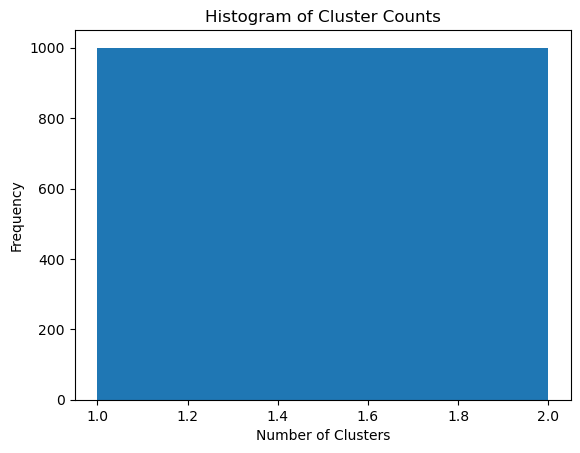

In [29]:
#NUMBER OF TRUE CLUSTERS PER EVENT

import pickle
import numpy as np
import torch
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set file pattern and file limit
file_pattern = r'C:\Users\tsoli\OneDrive\Documents\School\1 - University of Minnesota\Year 17\Year 1 Research\picklefiles\photons\*.pkl'
file_limit = 1000

# Load data from pkl files
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        score_noise_filter = pickle.load(f)
        pass_noise_filter = pickle.load(f)
        out_gravnet = pickle.load(f)
    return data, score_noise_filter, pass_noise_filter, out_gravnet

# Clustering algorithm from plots3D.
def get_clustering(beta, X, threshold_beta=0.2, threshold_dist=0.5):
    n_points = beta.shape[0]
    select_condpoints = beta > threshold_beta
    indices_condpoints = np.nonzero(select_condpoints)[0]
    indices_condpoints = indices_condpoints[np.argsort(-beta[select_condpoints])]
    unassigned = np.arange(n_points)
    clustering = -1 * np.ones(n_points, dtype=np.int32)
    
    for index_condpoint in indices_condpoints:
        d = np.linalg.norm(X[unassigned] - X[index_condpoint], axis=-1)
        assigned_to_this_condpoint = unassigned[d < threshold_dist]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < threshold_dist)]
    
    return clustering

# Parsing true input.
def process_data(data):
    true_energies = data.x[:, 0].numpy()
    true_clusters = data.y.numpy()
    return true_energies, true_clusters

# Parsing network output.
def process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet):
    beta = torch.sigmoid(out_gravnet[:, 0]).numpy()
    cluster_space_coords = out_gravnet[:, 1:].numpy()
    pred_clusters_pnf = get_clustering(beta, cluster_space_coords, threshold_beta=0.2, threshold_dist=0.5)
    pred_clusters = np.zeros_like(pass_noise_filter, dtype=np.int32)
    pred_clusters[pass_noise_filter] = pred_clusters_pnf
    return pred_clusters

def main():
    files = glob.glob(file_pattern)[:file_limit]

    cluster_counts = []

    for file_path in tqdm(files):
        data, score_noise_filter, pass_noise_filter, out_gravnet = load_data(file_path)
        true_energies, true_clusters = process_data(data)
        unique_clusters = np.unique(true_clusters[true_clusters != 0])
        cluster_counts.append(len(unique_clusters))
    
    plt.hist(cluster_counts, bins=range(1, max(cluster_counts) + 2))
    #plt.hist(cluster_counts, bins=range(1, max(cluster_counts) + 2), edgecolor='black') #print the edges of the bars
    plt.xlabel('Number of Clusters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Cluster Counts')
    plt.show()

if __name__ == '__main__':
    main()

100%|██████████| 100/100 [00:01<00:00, 59.25it/s]


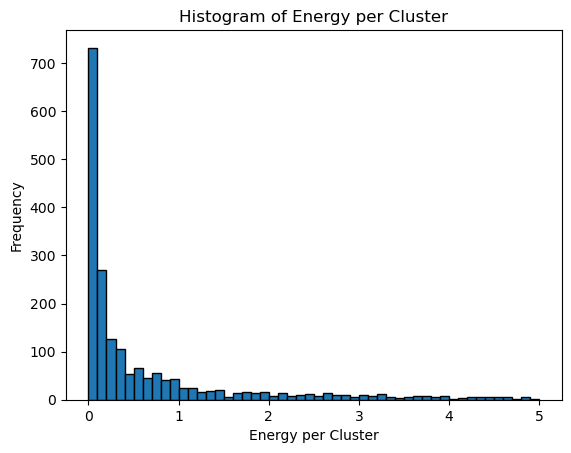

In [74]:
# ENERGY PER PREDICTED CLUSTER

import pickle
import numpy as np
import torch
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set file pattern and file limit
file_pattern = r'C:\Users\tsoli\OneDrive\Documents\School\1 - University of Minnesota\Year 17\Year 1 Research\picklefiles\tau\*.pkl'
file_limit = 100

# Load data from pkl files
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        score_noise_filter = pickle.load(f)
        pass_noise_filter = pickle.load(f)
        out_gravnet = pickle.load(f)
    return data, score_noise_filter, pass_noise_filter, out_gravnet

# Clustering algorithm from plots3D.
def get_clustering(beta, X, threshold_beta=0.2, threshold_dist=0.5):
    n_points = beta.shape[0]
    select_condpoints = beta > threshold_beta
    indices_condpoints = np.nonzero(select_condpoints)[0]
    indices_condpoints = indices_condpoints[np.argsort(-beta[select_condpoints])]
    unassigned = np.arange(n_points)
    clustering = -1 * np.ones(n_points, dtype=np.int32)
    
    for index_condpoint in indices_condpoints:
        d = np.linalg.norm(X[unassigned] - X[index_condpoint], axis=-1)
        assigned_to_this_condpoint = unassigned[d < threshold_dist]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < threshold_dist)]
    
    return clustering

# Parsing true input.
def process_data(data):
    true_energies = data.x[:, 0].numpy()
    true_clusters = data.y.numpy()
    return true_energies, true_clusters

# Parsing network output.
def process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet):
    beta = torch.sigmoid(out_gravnet[:, 0]).numpy()
    cluster_space_coords = out_gravnet[:, 1:].numpy()
    pred_clusters_pnf = get_clustering(beta, cluster_space_coords, threshold_beta=0.2, threshold_dist=0.5)
    pred_clusters = np.zeros_like(pass_noise_filter, dtype=np.int32)
    pred_clusters[pass_noise_filter] = pred_clusters_pnf
    return pred_clusters

def main():
    files = glob.glob(file_pattern)[:file_limit]

    cluster_energies = []

    for file_path in tqdm(files):
        data, score_noise_filter, pass_noise_filter, out_gravnet = load_data(file_path)
        true_energies, _ = process_data(data)
        pred_clusters = process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet)
        
        unique_clusters = np.unique(pred_clusters[(pred_clusters != 0) & (pred_clusters != -1)])
        for cluster in unique_clusters:
            cluster_energy = np.sum(true_energies[pred_clusters == cluster])
            cluster_energies.append(cluster_energy)

    plt.hist(cluster_energies, bins=50, range=(0,5), edgecolor='black')
    plt.xlabel('Energy per Cluster')
    plt.ylabel('Frequency')
    plt.title('Histogram of Energy per Cluster')
    plt.show()

if __name__ == '__main__':
    main()

100%|██████████| 100/100 [00:00<00:00, 149.87it/s]


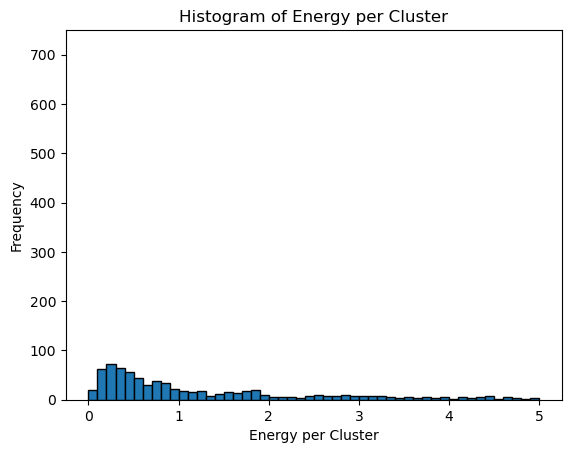

In [75]:
# ENERGY PER TRUE CLUSTER

import pickle
import numpy as np
import torch
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set file pattern and file limit
file_pattern = r'C:\Users\tsoli\OneDrive\Documents\School\1 - University of Minnesota\Year 17\Year 1 Research\picklefiles\tau\*.pkl'
file_limit = 100

# Load data from pkl files
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        score_noise_filter = pickle.load(f)
        pass_noise_filter = pickle.load(f)
        out_gravnet = pickle.load(f)
    return data, score_noise_filter, pass_noise_filter, out_gravnet

# Clustering algorithm from plots3D.
def get_clustering(beta, X, threshold_beta=0.2, threshold_dist=0.5):
    n_points = beta.shape[0]
    select_condpoints = beta > threshold_beta
    indices_condpoints = np.nonzero(select_condpoints)[0]
    indices_condpoints = indices_condpoints[np.argsort(-beta[select_condpoints])]
    unassigned = np.arange(n_points)
    clustering = -1 * np.ones(n_points, dtype=np.int32)
    
    for index_condpoint in indices_condpoints:
        d = np.linalg.norm(X[unassigned] - X[index_condpoint], axis=-1)
        assigned_to_this_condpoint = unassigned[d < threshold_dist]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < threshold_dist)]
    
    return clustering

# Parsing true input.
def process_data(data):
    true_energies = data.x[:, 0].numpy()
    true_clusters = data.y.numpy()
    return true_energies, true_clusters

# Parsing network output.
def process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet):
    beta = torch.sigmoid(out_gravnet[:, 0]).numpy()
    cluster_space_coords = out_gravnet[:, 1:].numpy()
    pred_clusters_pnf = get_clustering(beta, cluster_space_coords, threshold_beta=0.2, threshold_dist=0.5)
    pred_clusters = np.zeros_like(pass_noise_filter, dtype=np.int32)
    pred_clusters[pass_noise_filter] = pred_clusters_pnf
    return pred_clusters

def main():
    files = glob.glob(file_pattern)[:file_limit]

    cluster_energies = []

    for file_path in tqdm(files):
        data, score_noise_filter, pass_noise_filter, out_gravnet = load_data(file_path)
        true_energies, true_clusters = process_data(data)
        
        unique_clusters = np.unique(true_clusters[true_clusters != 0])
        for cluster in unique_clusters:
            cluster_energy = np.sum(true_energies[true_clusters == cluster])
            cluster_energies.append(cluster_energy)

    plt.hist(cluster_energies, bins=50, range=(0,5), edgecolor='black')
    plt.xlabel('Energy per Cluster')
    plt.ylabel('Frequency')
    plt.title('Histogram of Energy per Cluster')
    plt.ylim(0,750)
    plt.show()

if __name__ == '__main__':
    main()

100%|██████████| 1000/1000 [00:09<00:00, 108.56it/s]


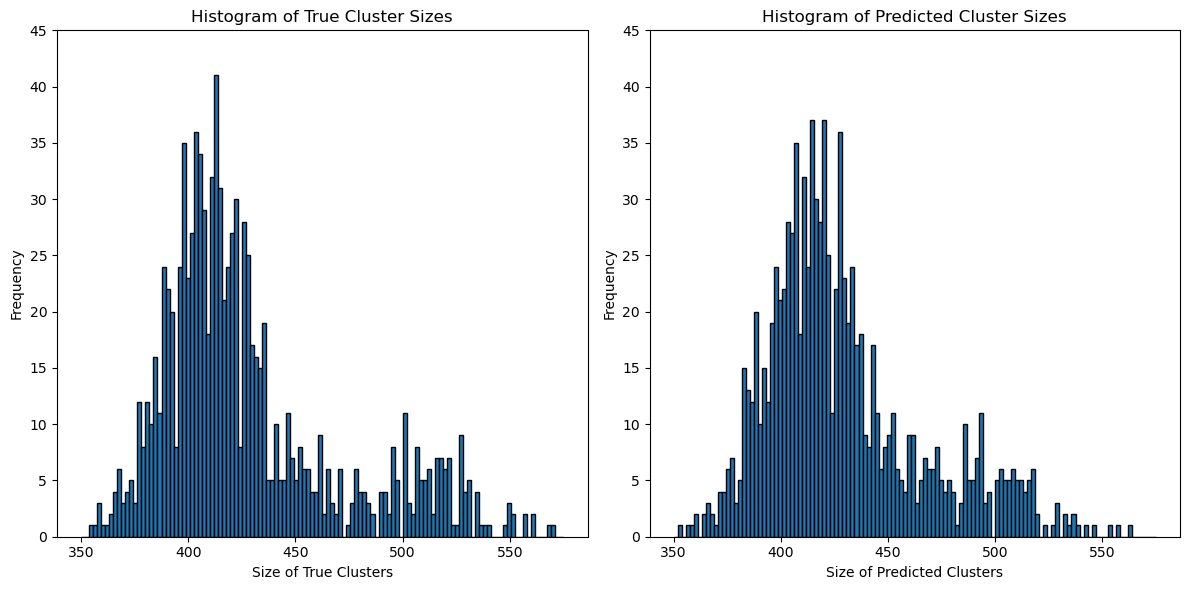

Size of pred_clusters:  6466
Size of true_clusters:  1000


In [78]:
# TRUE AND PREDICTED CLUSTER SIZE 

import pickle
import numpy as np
import torch
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set file pattern and file limit
file_pattern = r'C:\Users\tsoli\OneDrive\Documents\School\1 - University of Minnesota\Year 17\Year 1 Research\picklefiles\photons\*.pkl'
file_limit = 1000

# Load data from pkl files
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        score_noise_filter = pickle.load(f)
        pass_noise_filter = pickle.load(f)
        out_gravnet = pickle.load(f)
    return data, score_noise_filter, pass_noise_filter, out_gravnet

# Clustering algorithm from plots3D.
def get_clustering(beta, X, threshold_beta=0.2, threshold_dist=0.5):
    n_points = beta.shape[0]
    select_condpoints = beta > threshold_beta
    indices_condpoints = np.nonzero(select_condpoints)[0]
    indices_condpoints = indices_condpoints[np.argsort(-beta[select_condpoints])]
    unassigned = np.arange(n_points)
    clustering = -1 * np.ones(n_points, dtype=np.int32)
    
    for index_condpoint in indices_condpoints:
        d = np.linalg.norm(X[unassigned] - X[index_condpoint], axis=-1)
        assigned_to_this_condpoint = unassigned[d < threshold_dist]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < threshold_dist)]
    
    return clustering

# Parsing true input.
def process_data(data):
    true_energies = data.x[:, 0].numpy()
    true_clusters = data.y.numpy()
    return true_energies, true_clusters

# Parsing network output.
def process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet):
    beta = torch.sigmoid(out_gravnet[:, 0]).numpy()
    cluster_space_coords = out_gravnet[:, 1:].numpy()
    pred_clusters_pnf = get_clustering(beta, cluster_space_coords, threshold_beta=0.2, threshold_dist=0.5)
    pred_clusters = np.zeros_like(pass_noise_filter, dtype=np.int32)
    pred_clusters[pass_noise_filter] = pred_clusters_pnf
    return pred_clusters

def main():
    files = glob.glob(file_pattern)[:file_limit]

    true_cluster_sizes = []
    pred_cluster_sizes = []

    for file_path in tqdm(files):
        data, score_noise_filter, pass_noise_filter, out_gravnet = load_data(file_path)
        true_energies, true_clusters = process_data(data)
        pred_clusters = process_gravnet(score_noise_filter, pass_noise_filter, out_gravnet)
        
        """
        Change to this to EXCLUDE all true and predicted noise
        """       
        unique_true_clusters = np.unique(true_clusters[true_clusters != 0])
        for cluster in unique_true_clusters:
           true_cluster_sizes.append(np.sum(true_clusters == cluster))
        
        unique_pred_clusters = np.unique(pred_clusters[(pred_clusters != 0) & (pred_clusters != -1)])
        for cluster in unique_pred_clusters:
          pred_cluster_sizes.append(np.sum(pred_clusters == cluster))
          
        """
        Remove any cluster size smaller than 300 (do this for zoomed in plots)
        """

        # true_cluster_sizes = [size for size in true_cluster_sizes if size >= 300]
        # pred_cluster_sizes = [size for size in pred_cluster_sizes if size >= 300]

        """ 
        Change to this to EXCLUDE all true and predicted noise
        """        
        
        # unique_true_clusters = np.unique(true_clusters)
        # for cluster in unique_true_clusters:
        #     true_cluster_sizes.append(np.sum(true_clusters == cluster))
        
        # unique_pred_clusters = np.unique(pred_clusters)
        # for cluster in unique_pred_clusters:
        #     pred_cluster_sizes.append(np.sum(pred_clusters == cluster))

    # Define histograms
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    true_hist = plt.hist(true_cluster_sizes, bins=120, range = (350,575), edgecolor='black')
    plt.xlabel('Size of True Clusters')
    plt.ylabel('Frequency')
    plt.title('Histogram of True Cluster Sizes')

    plt.subplot(1, 2, 2)
    pred_hist = plt.hist(pred_cluster_sizes, bins=120, range = (350,575), edgecolor='black')
    plt.xlabel('Size of Predicted Clusters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Predicted Cluster Sizes')    

    # Show Plots: ZOOMED OUT - (ylim = max_y), ZOOMED IN - (ylim = smaller value)
    
    max_y = max(max(true_hist[0]), max(pred_hist[0])) * 1.1
    
    plt.subplot(1, 2, 1)
    plt.ylim(0, 45)

    plt.subplot(1, 2, 2)
    plt.ylim(0, 45)

    plt.tight_layout()
    plt.show()

    # # Count clusters with sizes 1 to 10
    # true_cluster_counts = [true_cluster_sizes.count(i) for i in range(1, 11)]
    # pred_cluster_counts = [pred_cluster_sizes.count(i) for i in range(1, 11)]

    # print("True Clusters with sizes 1 to 10 hits:")
    # for i, count in enumerate(true_cluster_counts, start=1):
    #     print(f"Size {i}: {count} clusters")

    # print("\nPredicted Clusters with sizes 1 to 10 hits:")
    # for i, count in enumerate(pred_cluster_counts, start=1):
    #     print(f"Size {i}: {count} clusters")
    
    print("Size of pred_clusters: ", len(pred_cluster_sizes))
    print("Size of true_clusters: ", len(true_cluster_sizes))

if __name__ == '__main__':
    main()

    